<div style="border: solid blue 2px; padding: 20px">

Hello Dinesh,

Congratulations on successfully submitting your project! 🎉

Another project completed — fantastic work! Every step you take brings you closer to mastering the skills needed to excel in Data Science. Your dedication is evident, and you should be proud of your efforts.

Keep up the great momentum! As we review this project together, you’ll find **specific notes** inside the project file, highlighted in green or yellow for easy reference.

<div class="alert alert-success" style="border-left: 7px solid green">
<b>✅ Reviewer's Comment</b> 
    
Comments marked in green highlight efficient solutions and good ideas that can be applied in future projects. 
</div>

<div class="alert alert-warning" style="border-left: 7px solid gold">
<b>⚠️ Reviewer's Comment</b> 
    
Comments marked in yellow indicate areas where there is room for optimization. While corrections aren't mandatory, implementing these suggestions would be beneficial.
</div>

Congratulations once again on your journey and first hands-on experience. There are **no critical issues**, and your project has been **approved** — excellent job!

Keep up the amazing work! 🪄


# Analyzing Ride Patterns and Weather Impact: Loop to O'Hare


## Introduction

This analysis explores patterns in ride durations from the Loop to O'Hare International Airport and investigates the impact of weather conditions, particularly rainy Saturdays. Using data on taxi rides and weather conditions, we aim to test the hypothesis: "The average duration of rides changes on rainy Saturdays." 

The study includes:
1. Data exploration and preparation.
2. Statistical hypothesis testing to compare ride durations on rainy and non-rainy Saturdays.
3. Visualizations to support findings.
4. Insights and actionable recommendations for operational improvements.

The goal is to understand how external factors like weather influence ride durations and provide data-driven insights for optimizing Zuber's services.


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
The title and introduction are essential parts of the project. Very good that you start with them.
</div>


## Import Libraries and Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file1 = "/datasets/project_sql_result_01.csv"
file2 = "/datasets/project_sql_result_04.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Display the first few rows of each dataset
print("Dataset 1:")
print(df1.head())
print("\nDataset 2:")
print(df2.head())


Dataset 1:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Dataset 2:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 

It's advisable to import all necessary libraries in a separate, dedicated cell at the beginning of the notebook. This approach offers several advantages:

- If you need to add another library later in the project, you won’t have to reload the dataset or rerun previous cells.
- It improves the overall structure of the notebook, making it easier to manage dependencies and ensuring that all required libraries are imported before any code execution.

## Study the data

In [2]:
# Dataset 1 info and preview
print("Dataset 1 Info:")
print(df1.info())
print("\nDataset 1 Description:")
print(df1.describe())

# Dataset 2 info and preview
print("\nDataset 2 Info:")
print(df2.info())
print("\nDataset 2 Description:")
print(df2.describe())


Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Dataset 1 Description:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Dataset 2 Description:
       average_trips
count      94.000000
mean 

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 



    
After you've studied the data it is a best practice to write a brief summary of your observations.
    
In your observations, it is recommended to include the following:

- **Column names** – Indicate if any columns require renaming.
- **Data types** – Verify whether the current data types are optimal or need modification.
- **Missing values** – If the non-null count is less than the total number of entries, this indicates missing values.

You can easily obtain this information from the `head()` and `info()` methods on your dataset.


In [3]:
# Identify the top 10 neighborhoods by drop-offs
top_10_neighborhoods = df2.nlargest(10, 'average_trips')

# Display the result
print("Top 10 Neighborhoods by Average Drop-offs:")
print(top_10_neighborhoods)


Top 10 Neighborhoods by Average Drop-offs:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### Dataset-1 visualizations:

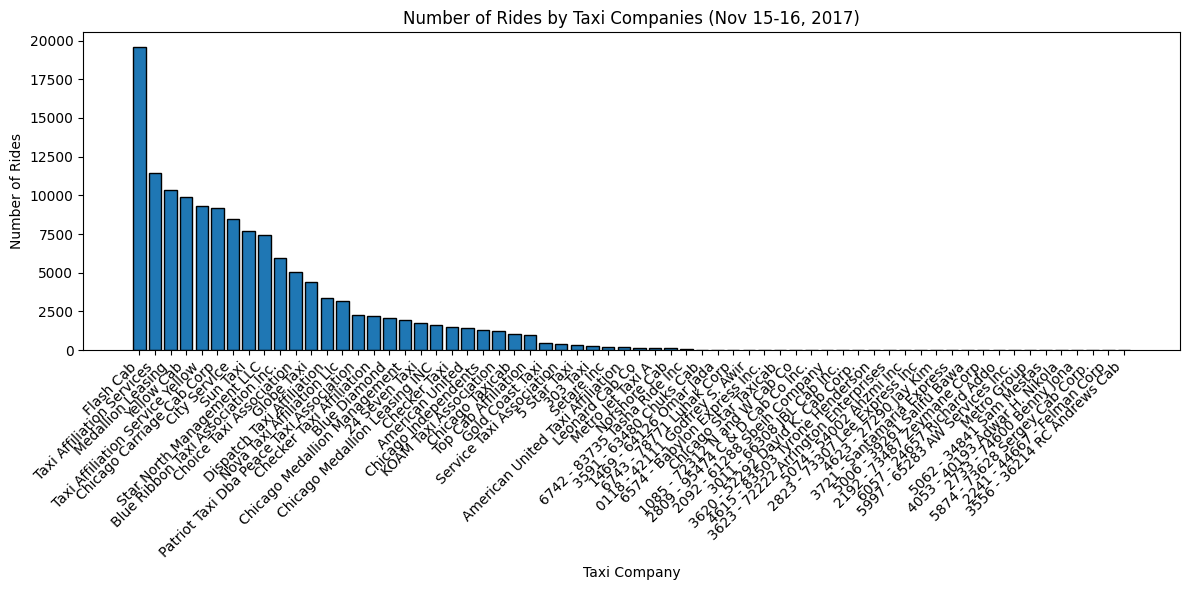

In [4]:
# Plot taxi companies and number of rides
plt.figure(figsize=(12, 6))
plt.bar(df1['company_name'], df1['trips_amount'], edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title("Number of Rides by Taxi Companies (Nov 15-16, 2017)")
plt.xlabel("Taxi Company")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


#### Number of Rides by Taxi Companies (Nov 15-16, 2017)
##### Flash Cab Dominates the Market:
Flash Cab is the leading taxi company, with a significantly higher number of rides (19,558) compared to other companies.
The second most popular company, Taxi Affiliation Services, has almost half the rides (11,422), indicating a considerable market share disparity.

##### Top Companies Contribute Most Rides:
A small group of companies (e.g., Flash Cab, Taxi Affiliation Services, Medallion Leasing) accounts for the majority of rides, while many others have much lower counts.

###### Long Tail of Companies:
Beyond the top companies, there is a long tail of smaller companies with minimal ride counts, suggesting a fragmented market with a few dominant players.

### Dataset-2 Visualizations:

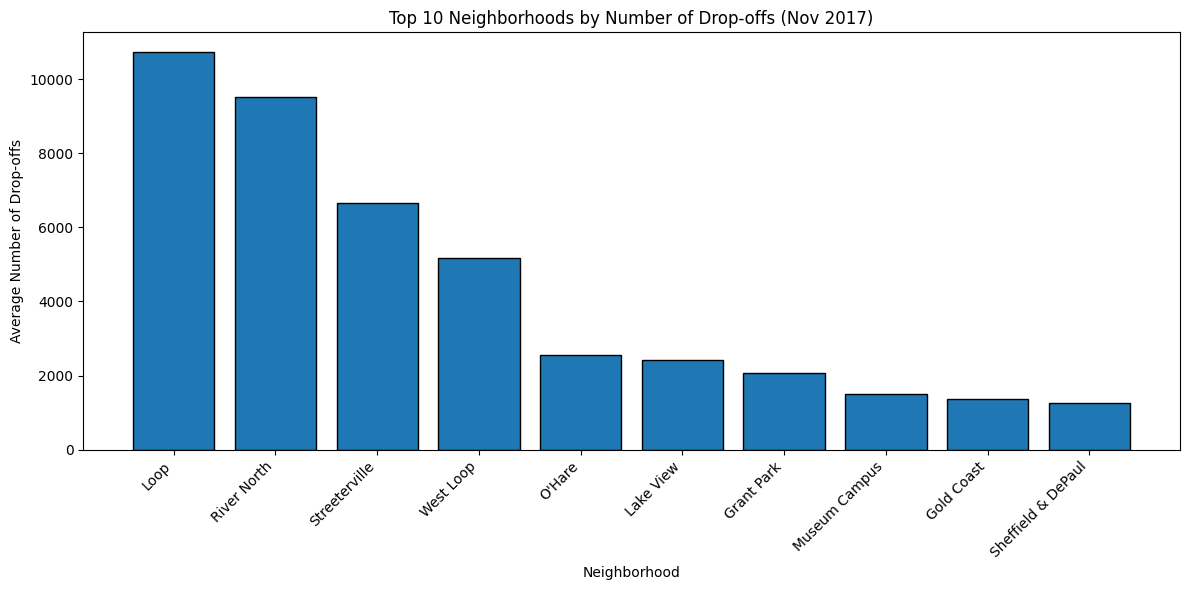

In [5]:
# Plot top 10 neighborhoods by average trips
plt.figure(figsize=(12, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Neighborhoods by Number of Drop-offs (Nov 2017)")
plt.xlabel("Neighborhood")
plt.ylabel("Average Number of Drop-offs")
plt.tight_layout()
plt.show()


#### Top 10 Neighborhoods by Number of Drop-offs (Nov 2017)
##### The Loop is the Most Popular Destination:
The Loop has the highest average drop-offs (10,727.47), likely due to its role as a central business district with high activity.

##### River North and Streeterville Follow:
River North and Streeterville, known for their mix of residential, commercial, and entertainment options, are also high-demand areas.

##### Airport (O'Hare) in the Middle:
O'Hare is ranked fifth, reflecting its importance as a major transportation hub.

##### Business and Tourism Drive Demand:
The neighborhoods dominating the top 10 (e.g., West Loop, Grant Park, and Museum Campus) are primarily business and tourism centers, indicating high demand from professionals and visitors.

##### Gradual Decline in Drop-offs:
After the top neighborhoods, there is a steady decline in average drop-offs, highlighting the concentrated demand in a few areas.

<div class="alert alert-success"; style="border-left: 7px solid green"> <b>✅ Reviewer’s Comment, v. 1</b>

Great job! You've created excellent charts with all the required elements, including a clear title, labeled axes, and appropriate scales. You've also drawn accurate conclusions from them.

## Step 5. Testing hypotheses (Python)

In [6]:
# Load the dataset
file3 = "/datasets/project_sql_result_07.csv"
df3 = pd.read_csv(file3)

# Display the first few rows
print("Dataset Preview:")
print(df3.head())

# Check the structure and data types
print("\nDataset Info:")
print(df3.info())


Dataset Preview:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [7]:
# Convert start_ts to datetime format
df3['start_ts'] = pd.to_datetime(df3['start_ts'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df3['day_of_week'] = df3['start_ts'].dt.dayofweek

# Filter data for Saturdays (day_of_week == 5)
saturday_rides = df3[df3['day_of_week'] == 5]

# Separate rainy and non-rainy Saturdays
rainy_saturdays = saturday_rides[saturday_rides['weather_conditions'] == 'Bad']
non_rainy_saturdays = saturday_rides[saturday_rides['weather_conditions'] == 'Good']

# Print counts
print(f"Total Saturday Rides: {len(saturday_rides)}")
print(f"Rainy Saturdays: {len(rainy_saturdays)}")
print(f"Non-Rainy Saturdays: {len(non_rainy_saturdays)}")


Total Saturday Rides: 1068
Rainy Saturdays: 180
Non-Rainy Saturdays: 888


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Well done on creating the two samples for the test.

### Total Rides on Saturdays:
You have 1,068 rides that occurred on Saturdays in the dataset.

### Rainy vs. Non-Rainy Saturdays:
180 rides occurred on rainy Saturdays (weather_conditions == 'Bad').

888 rides occurred on non-rainy Saturdays (weather_conditions == 'Good').


## Statistical Testing

In [8]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(
    rainy_saturdays['duration_seconds'],
    non_rainy_saturdays['duration_seconds'],
    equal_var=False  # Welch's t-test for unequal variances
)

# Display t-test results
print("\nT-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")



T-Test Results:
T-Statistic: 7.19
P-Value: 0.0000


In [9]:
# Set significance level
alpha = 0.05

if p_value < alpha:
    print("\nConclusion:")
    print("The p-value is less than the significance level (α).")
    print("We reject the null hypothesis. There is a significant difference in the average ride duration on rainy Saturdays compared to non-rainy Saturdays.")
else:
    print("\nConclusion:")
    print("The p-value is greater than or equal to the significance level (α).")
    print("We fail to reject the null hypothesis. There is no significant difference in the average ride duration on rainy Saturdays compared to non-rainy Saturdays.")



Conclusion:
The p-value is less than the significance level (α).
We reject the null hypothesis. There is a significant difference in the average ride duration on rainy Saturdays compared to non-rainy Saturdays.


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 

You've chosen a good type of test and conducted it corectly. However, it would be good to clearly formulate the hypothesis before the test and explain what criterion and why you chose it.

## Results Visualization

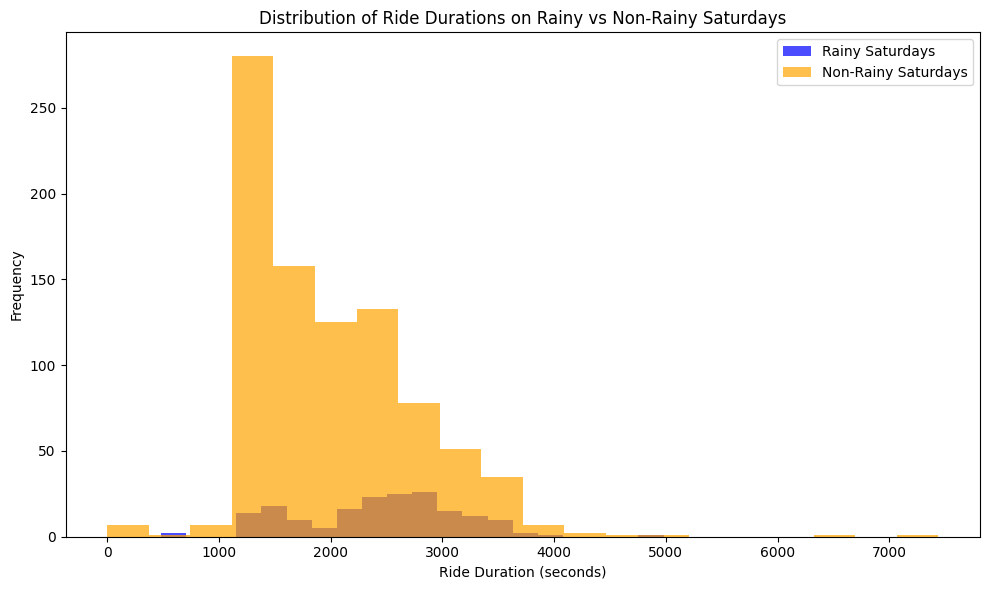

In [10]:
# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(rainy_saturdays['duration_seconds'], bins=20, alpha=0.7, label='Rainy Saturdays', color='blue')
plt.hist(non_rainy_saturdays['duration_seconds'], bins=20, alpha=0.7, label='Non-Rainy Saturdays', color='orange')
plt.title("Distribution of Ride Durations on Rainy vs Non-Rainy Saturdays")
plt.xlabel("Ride Duration (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


The hypothesis test compared the average ride duration from the Loop to O'Hare International Airport on rainy Saturdays versus non-rainy Saturdays. The null hypothesis, which stated that there is no significant difference, was rejected as the t-test yielded a t-statistic of 7.19 and a p-value of 0.0000, well below the significance level of 0.05. This indicates a statistically significant difference, with ride durations being longer on rainy Saturdays. The histogram further supports this conclusion, showing a shift toward longer durations on rainy days. These findings suggest that rainy weather likely causes delays due to slower traffic or reduced visibility. To address this, Zuber could prepare for longer durations on rainy days by increasing driver availability or implementing dynamic pricing to accommodate the additional time and effort required.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Excellent conclusion.